# **Colores del proyecto**

<img src="https://raw.githubusercontent.com/Belita-Lili/analisis-ventas-multitienda-alura/refs/heads/main/colors/COLORES.png" alt="inserir alt" width=480>

&nbsp;

#### Paleta del proyecto

|Blanco Neutro|||
|------|------|------|
| Blanco_1|Blanco_2 |Blanco_3 |
|#f2f2f2 | #d9d9d9| #bfbfbf |
| ![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/analisis-ventas-multitienda-alura/refs/heads/main/colors/B1.png)  |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/analisis-ventas-multitienda-alura/refs/heads/main/colors/B2.png) |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/analisis-ventas-multitienda-alura/refs/heads/main/colors/B3.png) |

&nbsp;

|Turquesa Profundo|||
|------|------|------|
|Turquesa_1 |Turquesa_2 |Turquesa_3 |
|#348e91 | ##2e7f82| #286f72 |
| ![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/analisis-ventas-multitienda-alura/refs/heads/main/colors/T1.png)  |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/analisis-ventas-multitienda-alura/refs/heads/main/colors/T2.png) |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/analisis-ventas-multitienda-alura/refs/heads/main/colors/T3.png) |

&nbsp;

|Verde Botella||||||
|------|------|------|------|------|------|
|Negro Carbón| Abeto_1 |Abeto_2 |Verde_1 |Verde_2 |
|#0a0c0d | #213635 |#1d2f2f | #1c5052| #184647 |
|![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/analisis-ventas-multitienda-alura/refs/heads/main/colors/ColoresVerdes.png)|



In [340]:
# Adicionamos los colores al proyecto
Blanco_1,	Blanco_2,	Blanco_3 = "#f2f2f2","#d9d9d9","#bfbfbf"
Turquesa_1,	Turquesa_2,	Turquesa_3, ="#348e91",	"#2e7f82"	,"#286f72"
Negro_Carbón,	Abeto_1,	Abeto_2,	Verde_1,	Verde_2 ="#0a0c0d",	"#213635",	"#1d2f2f",	"#1c5052",	"#184647"

# **Importación de datos**



In [341]:
pip install geopandas

In [342]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import seaborn as sns
import pandas as pd
import folium

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [343]:
tienda.tail()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111
2358,Smartwatch,Electrónicos,195000.0,8600.0,18/06/2022,Felipe Santos,Cali,4,Tarjeta de crédito,1,3.43722,-76.52250


In [344]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


# **Analizar datos de la tienda**

## **Ingreso total por cada tienda**
En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

# **Análisis de facturación**



In [345]:
facturacion = [tienda['Precio'] + tienda['Costo de envío'], tienda2['Precio'] + tienda2['Costo de envío'], tienda3['Precio'] + tienda3['Costo de envío'], tienda4['Precio'] + tienda4['Costo de envío']]

In [346]:
facturacion

[0        171200.0
 1        200700.0
 2        225500.0
 3        798500.0
 4        355400.0
           ...    
 2354    1351000.0
 2355     298100.0
 2356     130100.0
 2357     726300.0
 2358     203600.0
 Length: 2359, dtype: float64,
 0        298900.0
 1         79100.0
 2        467100.0
 3        952600.0
 4        417200.0
           ...    
 2354     148400.0
 2355    1285300.0
 2356     840800.0
 2357    2340900.0
 2358     578500.0
 Length: 2359, dtype: float64,
 0       1351700.0
 1        303700.0
 2        320900.0
 3         62100.0
 4        547000.0
           ...    
 2354      28800.0
 2355      34000.0
 2356     502700.0
 2357     127800.0
 2358      72800.0
 Length: 2359, dtype: float64,
 0       1140800.0
 1        499200.0
 2         23700.0
 3         59000.0
 4        144500.0
           ...    
 2353     240300.0
 2354     360600.0
 2355      39100.0
 2356     160100.0
 2357      12500.0
 Length: 2358, dtype: float64]

In [347]:
# Lista de facturación por tienda (cada elemento es una Serie de valores por fila)
facturacion = [
    tienda['Precio'] + tienda['Costo de envío'],
    tienda2['Precio'] + tienda2['Costo de envío'],
    tienda3['Precio'] + tienda3['Costo de envío'],
    tienda4['Precio'] + tienda4['Costo de envío']
]

# Sumar facturación total de cada tienda
totales = [f.sum() for f in facturacion]
nombres_tiendas = ['Tienda A', 'Tienda B', 'Tienda C', 'Tienda D']

In [348]:
df_facturacion = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Facturación': totales
})

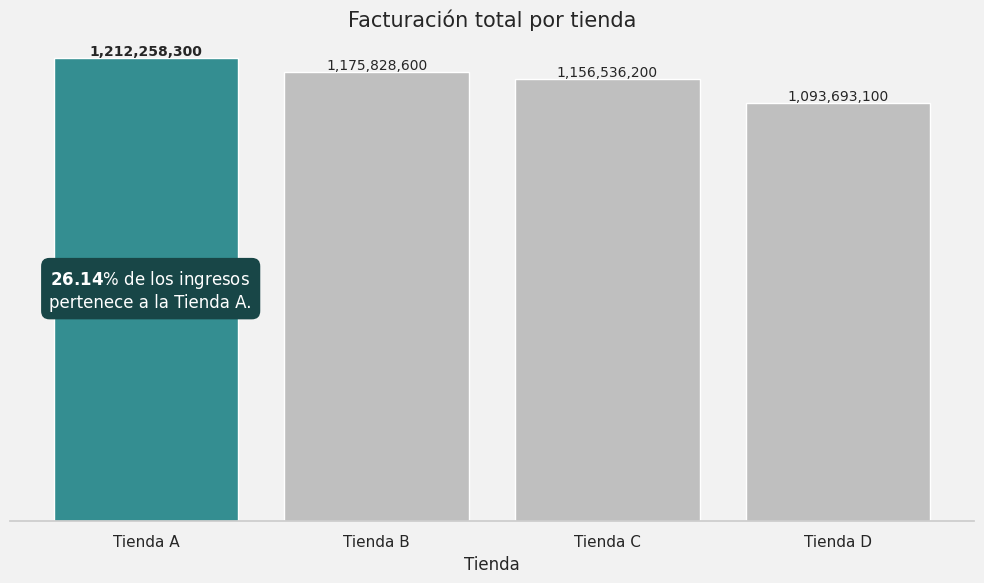

In [349]:
# Índice del valor máximo
max_index = df_facturacion['Facturación'].idxmax()

# Calcular porcentaje Tienda A
facturacion_total = df_facturacion['Facturación'].sum()
facturacion_tienda_a = df_facturacion[df_facturacion['Tienda'] == 'Tienda A']['Facturación'].values[0]
porcentaje = facturacion_tienda_a / facturacion_total * 100

# Configuraciones del gráfico
plt.figure(figsize=(10, 6), facecolor=Blanco_1)
ax = plt.axes()
ax.set_facecolor(Blanco_1)
bars = plt.bar(df_facturacion['Tienda'], df_facturacion['Facturación'], color=colors)

# Etiquetas por barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold' if bar.get_facecolor()[:3] == (52/255, 142/255, 145/255) else 'normal'
    )

# Texto destacado centrado
plt.text(
    x=len(df_facturacion) / 200,  # centro aproximado
    y=max(df_facturacion['Facturación']) * 0.50,  # altura del 90%
    s=f"$\\bf{{{porcentaje:.2f}}}$% de los ingresos \npertenece a la Tienda A.",
    ha='center',
    va='center',
    color='white',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor=Verde_2, edgecolor='none')
)

plt.title("Facturación total por tienda", fontsize=15)
plt.xlabel("Tienda")
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.ylabel("Facturación ($)")
plt.tight_layout()
plt.grid(False)
plt.show()

In [350]:
tienda['Tienda'] = 'Tienda A'
tienda2['Tienda'] = 'Tienda B'
tienda3['Tienda'] = 'Tienda C'
tienda4['Tienda'] = 'Tienda D'

In [351]:
# Unirlos en uno solo
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [352]:
# Convertir fecha
df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'], format='%d/%m/%Y')

# Extraer año
df_total['Mes'] = df_total['Fecha de Compra'].dt.month

# Calcular ingreso por compra
df_total['Ingreso'] = df_total['Precio'] + df_total['Costo de envío']


In [353]:
ingresos_por_tienda = df_total.groupby(['Mes', 'Tienda'])['Ingreso'].sum().reset_index()

In [354]:
# Crear gráfico

# Crear gráfico
fig = px.line(
    ingresos_por_tienda,
    x='Mes',
    y='Ingreso',
    color='Tienda',
    markers=True,
    title='Ingresos por Mes y Tienda',
    color_discrete_sequence=[Turquesa_1, Turquesa_2, Verde_1, Verde_2]  # Asigna tus colores
)

# Personaliza la apariencia del gráfico
fig.update_layout(
    width=800,
    height=400,
    xaxis_title='Mes',
    yaxis_title='Ingreso Total ($)',
    font_family='Arial',
    font_size=15,
    font_color='black',
    xaxis=dict(tickangle=-45),
    plot_bgcolor=Blanco_2,       # Color de fondo del área de la gráfica
    paper_bgcolor=Blanco_1       # Color de fondo total (incluye bordes)
)

fig.show()

## **Ventas por categoría**

In [355]:
# Agrupar por categoría y contar la cantidad de ventas (una fila = una venta)
ventas_por_categoria = [tienda['Categoría del Producto'].value_counts(), tienda2['Categoría del Producto'].value_counts(), tienda3['Categoría del Producto'].value_counts(), tienda4['Categoría del Producto'].value_counts()]

print(ventas_por_categoria)


[Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64, Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64, Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64, Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes            

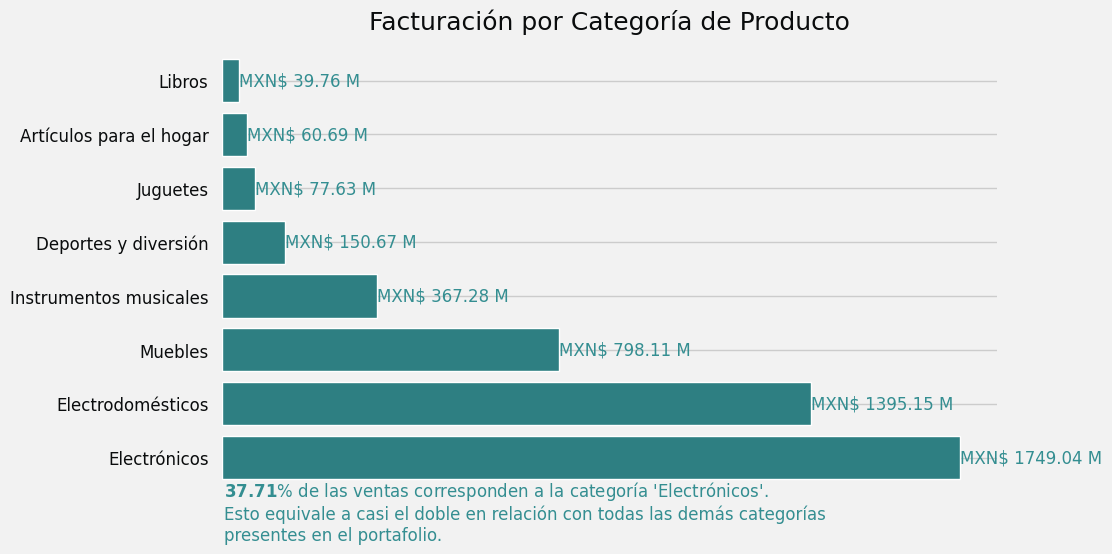

In [356]:
def facturacion_por_categoria(df):
    # Calcular facturación como suma de Precio + Costo de envío
    df['Facturación'] = df['Precio'] + df['Costo de envío']

    # Agrupar por categoría y calcular la facturación total
    facturacion_por_categoria = df.groupby('Categoría del Producto')['Facturación'].sum().sort_values(ascending=False)

    # Calcular porcentaje
    total_facturacion = facturacion_por_categoria.sum()
    percentual = facturacion_por_categoria.iloc[0] / total_facturacion * 100

    # Configuración del gráfico
    plt.figure(figsize=(10, 6), facecolor=Blanco_1)
    ax = plt.axes()
    ax.set_facecolor(Blanco_1)
    bars = plt.barh(facturacion_por_categoria.index, facturacion_por_categoria, color=Turquesa_2)

    # Agregar etiquetas y título
    plt.title('Facturación por Categoría de Producto', fontsize=18, color=Negro_Carbón)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=12, color=Negro_Carbón)
    plt.xticks([])
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

    # Agregar total de facturación al lado derecho de cada barra
    for bar in bars:
        plt.text(bar.get_width() + 1e5, bar.get_y() + bar.get_height()/2,
                 f'MXN$ {bar.get_width()/1e6:.2f} M',
                 ha='left', va='center', color=Turquesa_1, fontsize=12)

    # Agregar texto dentro del área del gráfico
    categoria_top = facturacion_por_categoria.index[0]
    plt.text(0.4e7, len(facturacion_por_categoria) - 9,
             f"$\\bf{percentual:.2f}$% de las ventas corresponden a la categoría '{categoria_top}'.\nEsto equivale a casi el doble en relación con todas las demás categorías\npresentes en el portafolio.",
             ha='left', va='center', color=Turquesa_1, fontsize=12)

    return plt

facturacion_por_categoria(df_total).show()

## **Calificación promedio de la tienda**


In [357]:
def distribucion_calificaciones_una_grafica(df):
    plt.figure(figsize=(12, 6), facecolor=Blanco_1)
    ax = plt.axes()
    ax.set_facecolor(Blanco_1)

    colores = {
        'Tienda A': Turquesa_1,  # Ejemplo
        'Tienda B': Turquesa_1,
        'Tienda C': Abeto_1,
        'Tienda D': Verde_1
    }

    for tienda, subdf in df.groupby('Tienda'):
        sns.histplot(
            subdf['Calificación'],
            bins=10,
            kde=False,
            color=colores.get(tienda, Turquesa_1),
            label=tienda,
            ax=ax,
            alpha=1
        )

    # Anotaciones por tienda en esquinas
    posiciones = {
        'Tienda A': (0.02, 0.95),
        'Tienda B': (0.25, 0.95),
        'Tienda C': (0.48, 0.95),
        'Tienda D': (0.72, 0.95),
    }

    for tienda, subdf in df.groupby('Tienda'):
        promedio = subdf['Calificación'].mean().round(2)
        nota_max = subdf['Calificación'].max()
        nota_min = subdf['Calificación'].min()
        frecuencia = len(subdf)

        texto = (f"{tienda}\n"
                 f"Frecuencia: {frecuencia}\n"
                 f"Promedio: {promedio}\n"
                 f"Máx: {nota_max}\n"
                 f"Mín: {nota_min}")

        # Posición relativa en el gráfico
        x_pos, y_pos = posiciones.get(tienda, (0.9, 0.9))

        ax.annotate(
            texto,
            xy=(x_pos, y_pos), xycoords='axes fraction',
            ha='left', va='top',
            fontsize=10, color=colores.get(tienda, Turquesa_1),
            bbox=dict(boxstyle="round,pad=0.3", edgecolor=Blanco_3, facecolor=Blanco_2)
        )

    # Personalización general
    plt.title('Distribución de Calificaciones por Tienda', fontsize=16, color=Negro_Carbón)
    plt.xlabel('Calificación', fontsize=12, color=Verde_2)
    plt.ylabel('Frecuencia', fontsize=12, color=Verde_2)
    plt.xticks(fontsize=12, color=Verde_2)
    plt.yticks(fontsize=12, color=Verde_2)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.yaxis.grid(color=Blanco_3, linestyle='--', linewidth=1)
    ax.set_axisbelow(True)
    plt.legend(title='Tienda', fontsize=10)

    return plt

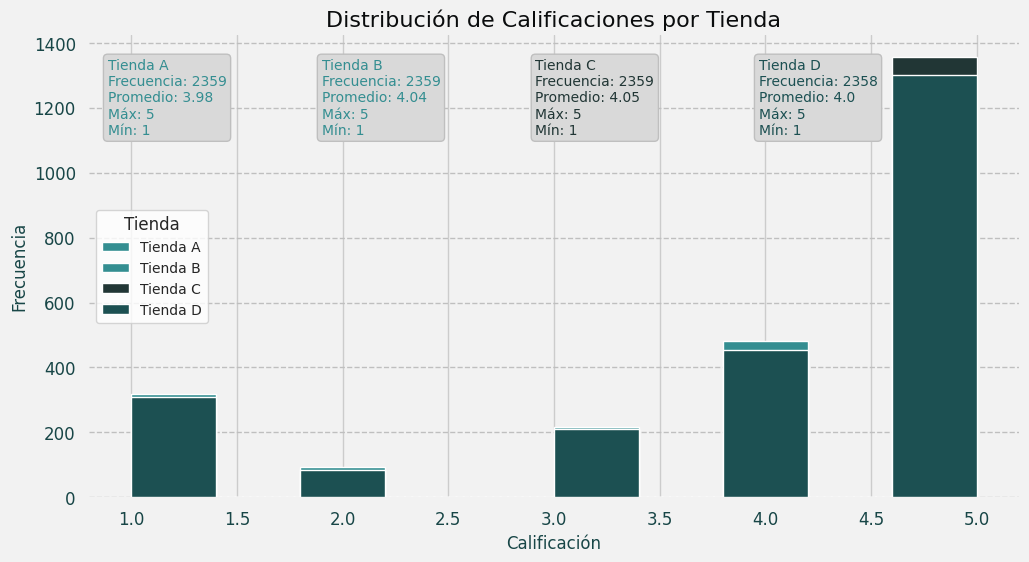

In [358]:
distribucion_calificaciones_una_grafica(df_total).show()

## **Productos más y menos vendidos**

In [359]:
def productos_mas_y_menos_vendidos(df):
    # Contar las ventas por producto
    ventas_por_producto = df['Producto'].value_counts().sort_values(ascending=True)

    # Colores para los productos más y menos vendidos
    colores = [Verde_1 if i == 0 else Verde_2 if i == 1 else Abeto_1 if i == len(ventas_por_producto)-2 else Abeto_2
               for i in range(len(ventas_por_producto))]

    # Configurar gráfico
    plt.figure(figsize=(10, 8), facecolor=Blanco_1)
    ax = plt.axes()
    ax.set_facecolor(Blanco_1)

    # Gráfico de barras horizontal
    bars = plt.barh(ventas_por_producto.index, ventas_por_producto.values, color=colores)

    # Etiquetas
    plt.title('Productos Más y Menos Vendidos', fontsize=12, color=Blanco_1)
    plt.xlabel('Cantidad de Ventas', fontsize=12, color=Turquesa_1)
    plt.xticks(fontsize=12, color=Turquesa_1)
    plt.yticks(fontsize=10, color=Turquesa_1)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

    # Añadir etiquetas a las barras
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/50,
                 f'{int(bar.get_width())}', ha='left', va='center', color=Turquesa_1, fontsize=12)

    return plt


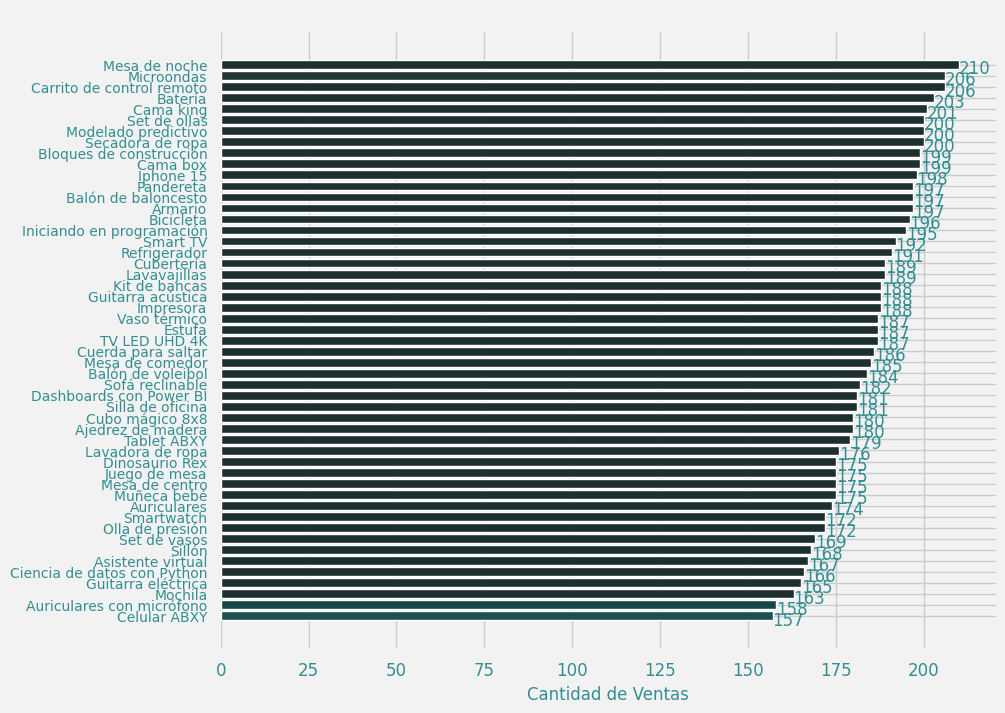

In [360]:
productos_mas_y_menos_vendidos(df_total).show()

## **Envío promedio por tienda**

In [361]:
# Calcular envío promedio por tienda
envio_promedio_por_tienda = df_total.groupby('Lugar de Compra')['Costo de envío'].mean().reset_index()

# Redondear si deseas
envio_promedio_por_tienda['Costo de envío'] = envio_promedio_por_tienda['Costo de envío'].round(2)

print(envio_promedio_por_tienda)

   Lugar de Compra  Costo de envío
0          Armenia        22867.86
1     Barranquilla        22692.26
2           Bogotá        24532.08
3      Bucaramanga        26790.06
4             Cali        26726.81
5        Cartagena        22638.43
6           Cúcuta        28597.31
7          Inírida        30557.14
8          Leticia        25317.61
9        Manizales        24948.78
10        Medellín        25282.02
11           Neiva        27710.00
12           Pasto        27801.06
13         Pereira        23211.41
14        Riohacha        24127.61
15     Santa Marta        18752.32
16          Soacha        34768.42
17      Valledupar        22021.43
18   Villavicencio        25100.00


In [362]:
def grafica_costo_envio_promedio(df):
    # Agrupar y calcular promedio
    envio_promedio_por_tienda = df.groupby('Lugar de Compra')['Costo de envío'].mean().reset_index()
    envio_promedio_por_tienda['Costo de envío'] = envio_promedio_por_tienda['Costo de envío'].round(2)

    # Ordenar para mejor visualización
    envio_promedio_por_tienda = envio_promedio_por_tienda.sort_values('Costo de envío')

    plt.figure(figsize=(12, 8), facecolor=Blanco_1)
    ax = plt.axes()
    ax.set_facecolor(Blanco_1)

    bars = plt.barh(envio_promedio_por_tienda['Lugar de Compra'], envio_promedio_por_tienda['Costo de envío'], color=Turquesa_1)

    plt.title('Costo de Envío Promedio por Lugar de Compra', fontsize=18, color=Negro_Carbón)
    plt.xlabel('Costo de Envío Promedio', fontsize=14, color=Negro_Carbón)
    plt.ylabel('Lugar de Compra', fontsize=14, color=Negro_Carbón)
    plt.xticks(fontsize=12, color=Negro_Carbón)
    plt.yticks(fontsize=12, color=Negro_Carbón)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

    # Etiquetas de valor en cada barra
    for bar in bars:
        ancho = bar.get_width()
        plt.text(ancho + 500, bar.get_y() + bar.get_height() / 2, f'{ancho:.0f}', ha='left', va='center', fontsize=11, color=Negro_Carbón)

    plt.tight_layout()
    return plt

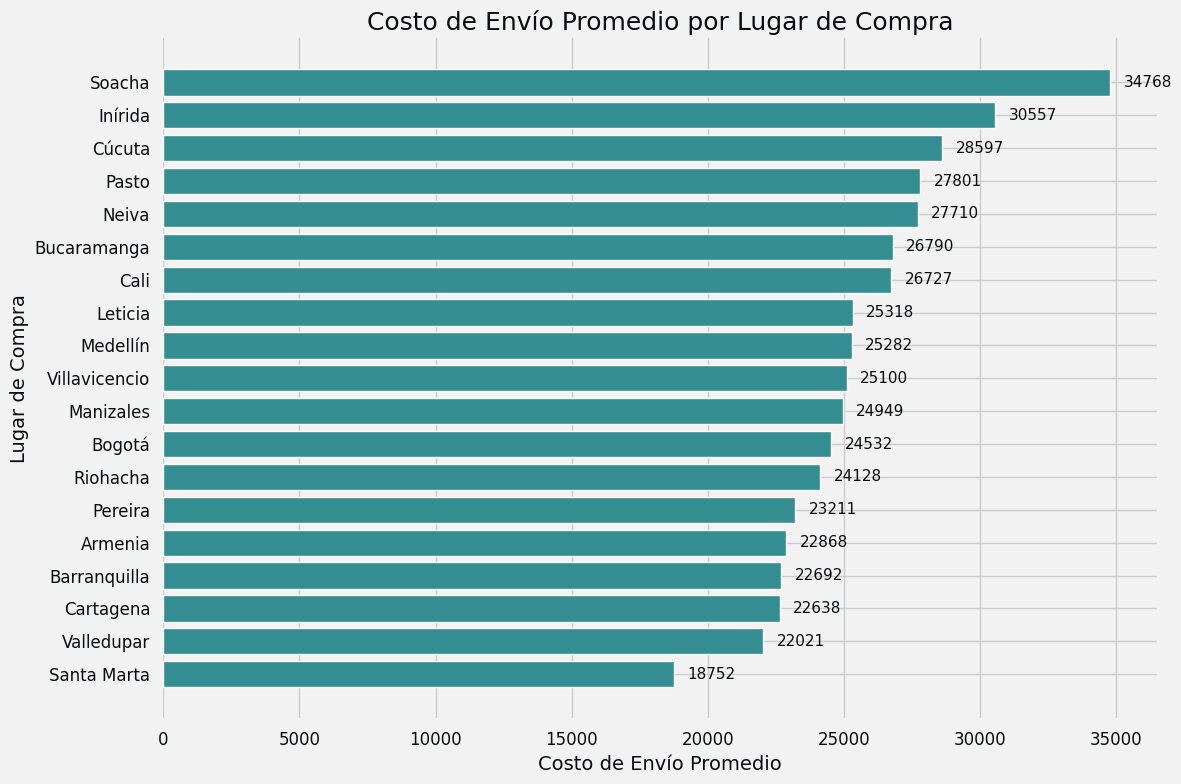

In [363]:
grafica_costo_envio_promedio(df_total).show()

# **Análisis del desempeño geográfico**

## **Lugar de Compra**

In [364]:
# Supongamos que 'tabla' ya tiene las columnas 'lat' y 'lon'
# Convertir a GeoDataFrame con geometría de puntos
tabla_gdf = gpd.GeoDataFrame(
    tienda,
    geometry=gpd.points_from_xy(tienda2['lon'], tienda2['lat']),
    crs="EPSG:4326"  # WGS 84 (lat/lon estándar)
)

In [365]:
# Leer el archivo .shp de Colombia (por ejemplo: municipios o departamentos)
colombia = gpd.read_file("gadm41_COL_1.shp")  # Cambia el nombre según tu archivo

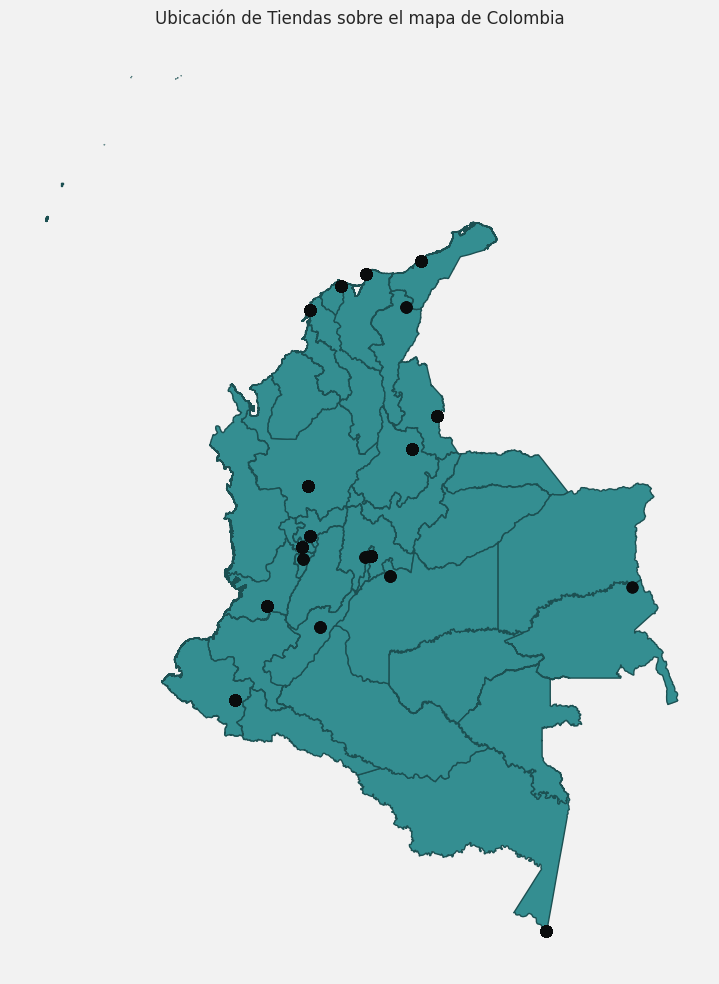

In [369]:
# Crear la figura y los ejes con fondo blanco antes de graficar
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor(Blanco_1)   # Fondo del lienzo
ax.set_facecolor(Blanco_1)          # Fondo del área de dibujo
ax.set_axis_off()                   # Eliminar ejes y ticks

# Mapa base con color uniforme
colombia.plot(ax=ax, color=Turquesa_1, edgecolor=Verde_1)

# Puntos de tienda
tabla_gdf.plot(ax=ax, color=Negro_Carbón, markersize=60)

# Título (sin etiquetas de eje porque quitaste los ejes)
plt.title("Ubicación de Tiendas sobre el mapa de Colombia")

plt.tight_layout()
plt.show()
